In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

   accuracy  quiz_time_taken  study_duration
0      0.44             22.0             5.0
1      0.96             18.0             1.0
2      0.76             13.0             2.5
3      0.64             25.0             3.5
4      0.24             22.0             6.5


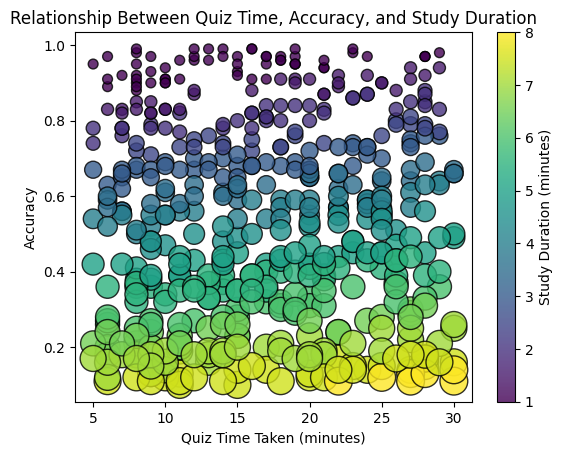

In [24]:

# Set random seed for reproducibility
np.random.seed(42)

# Generate 500 data points
num_rows = 500

# Generate random accuracy values between 0.1 and 1
accuracy = np.round(np.random.uniform(0.1, 1, num_rows), 2)

# Generate random quiz_time_taken between 5 and 30 minutes
quiz_time_taken = np.round(np.random.uniform(5, 30, num_rows),0)

# Define weights (A > B to prioritize accuracy influence)
A = -0.08  # Negative weight for accuracy to ensure higher accuracy reduces study time
B = 0.03  # Positive weight for quiz_time_taken to ensure higher quiz time increases study time

# Calculate study duration
study_duration = 8 + (A * (accuracy * 100)) + (B * quiz_time_taken)

# Ensure study duration is within 1 - 8 range
study_duration = np.clip(study_duration, 1, 8)

# Round study duration to the nearest 30 minutes
study_duration = (0.5 * np.round(study_duration / 0.5)).astype(float)

# Create DataFrame
df = pd.DataFrame({
    'accuracy': accuracy,
    'quiz_time_taken': quiz_time_taken,
    'study_duration': study_duration
})

print(df.head())

# Use a scatter plot with color representing accuracy and size representing study_duration
scatter = plt.scatter(
    df['quiz_time_taken'],  # X-axis: Quiz time taken
    df['accuracy'],         # Y-axis: Accuracy
    c=df['study_duration'], # Color: Study duration
    s=df['study_duration'] * 50, # Size: Study duration
    cmap='viridis',         # Color map for study duration
    alpha=0.8,              # Transparency for better visibility
    edgecolor='black'       # Add edges to points for clarity
)

# Add a color bar to show the study duration scale
cbar = plt.colorbar(scatter)
cbar.set_label('Study Duration (minutes)')

# Add labels and title
plt.xlabel('Quiz Time Taken (minutes)')
plt.ylabel('Accuracy')
plt.title('Relationship Between Quiz Time, Accuracy, and Study Duration')

# Show the plot
plt.show()


In [25]:

data = pd.DataFrame(df)
#  Define features (X) and target (y)
X = data[['accuracy', 'quiz_time_taken']]  # Add other features if you have them
y = data['study_duration']

#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 10],
    'min_samples_leaf': [3, 5, 8],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Regressor
rf_reg = RandomForestRegressor(max_depth= 8, min_samples_leaf= 5, min_samples_split= 2, n_estimators= 300, random_state=42)

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

#  Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.02999081291630786
Root Mean Squared Error: 0.1731785578999544
R-squared: 0.9929883365188565


In [31]:
# Example of making a prediction for a new student:
new_student_data = pd.DataFrame({'accuracy': [0.8], 'quiz_time_taken': [7]})  # Example values
predicted_study_duration = rf_reg.predict(new_student_data)
print(f"Predicted study duration for best case: {predicted_study_duration[0]}")

new_student_data_worst = pd.DataFrame({'accuracy': [0.5], 'quiz_time_taken': [20]})  # Example values
predicted_study_duration_worst = rf_reg.predict(new_student_data_worst)
print(f"Predicted study duration for worst case: {predicted_study_duration_worst[0]}")

Predicted study duration for best case: 1.8225359526595988
Predicted study duration for worst case: 4.788467193866329


In [32]:


filename = 'model.joblib'
joblib.dump(rf_reg, filename)

['model.joblib']